# **Hypothesis Testing Exercise 1**

# **A F&B manager wants to determine whether there is any significant difference in the diameter of the cutlet between two units. A randomly selected sample of cutlets was collected from both units and measured? Analyze the data and draw inferences at 5% significance level. Please state the assumptions and tests that you carried out to check validity of the assumptions.**

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm

In [ ]:
dataset=pd.read_csv('/content/Cutlets.csv')
dataset.head()

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522


In [ ]:
dataset.describe()

,Unit A,Unit B
count,35.000000,35.000000
mean,7.019091,6.964297
std,0.288408,0.343401
min,6.437600,6.038000
25%,6.831500,6.753600
50%,6.943800,6.939900
75%,7.280550,7.195000
max,7.516900,7.545900


In [ ]:
dataset.isnull().sum()

Unit A    0
Unit B    0
dtype: int64

In [ ]:
dataset[dataset.duplicated()]

,Unit A,Unit B


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Unit A  35 non-null     float64
 1   Unit B  35 non-null     float64
dtypes: float64(2)
memory usage: 688.0 bytes


{'whiskers': [<matplotlib.lines.Line2D at 0x7f2c32c3ece0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f2c32c3f220>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f2c32c3ea40>],
 'medians': [<matplotlib.lines.Line2D at 0x7f2c32c3f760>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f2c32c3fa00>],
 'means': []}

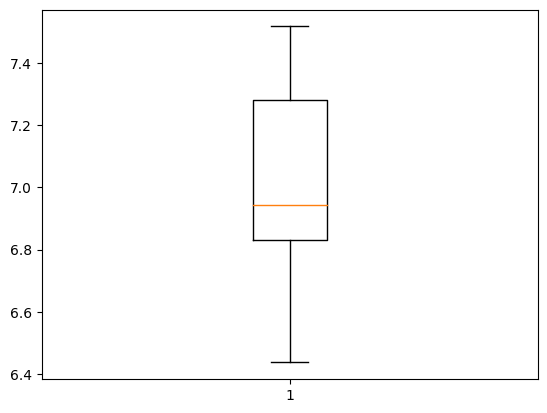

In [ ]:
import matplotlib.pyplot as plt
plt.boxplot(dataset['Unit A'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f2c32cbd900>,
 'caps': [<matplotlib.lines.Line2D at 0x7f2c32cbde40>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f2c32cbd660>],
 'medians': [<matplotlib.lines.Line2D at 0x7f2c32cbe380>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f2c32cbe620>],
 'means': []}

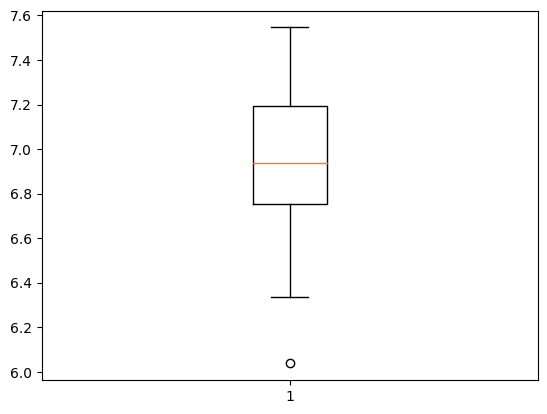

In [ ]:
plt.boxplot(dataset['Unit B'])

<ipython-input-26-a8604ed05e1b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Unit A'],color='purple')


Kurtosis of the distribution: -0.9615927279933039
Skewness of the distribution: -0.11831876799632962


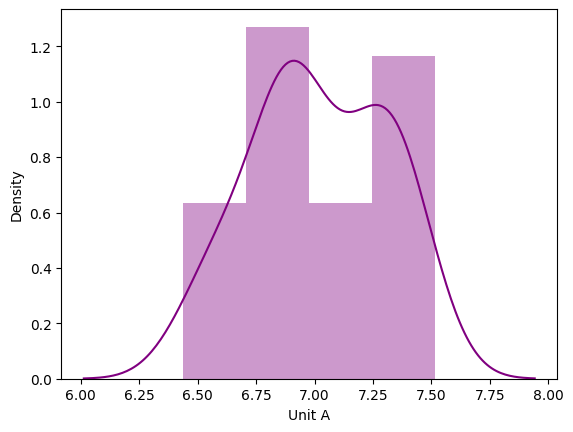

In [ ]:
import seaborn as sns
import scipy.stats as stats
sns.distplot(dataset['Unit A'],color='purple')
print( 'Kurtosis of the distribution: {}'.format(stats.kurtosis(dataset['Unit A']))) # for normal it should be close to zero.here it is -0.9615
print( 'Skewness of the distribution: {}'.format(stats.skew(dataset['Unit A']))) # for normal skewness should be btwn -1 and 1

<ipython-input-27-30a4811f136a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Unit B'],color='purple')


Kurtosis of the distribution: 0.005993878914965833
Skewness of the distribution: -0.36346396788317403


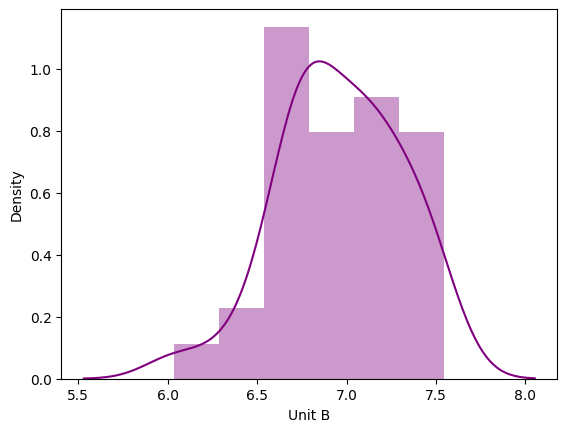

In [ ]:
sns.distplot(dataset['Unit B'],color='purple')
print( 'Kurtosis of the distribution: {}'.format(stats.kurtosis(dataset['Unit B']))) # for normal it should be close to zero.here it is -0.9615
print( 'Skewness of the distribution: {}'.format(stats.skew(dataset['Unit B']))) # for normal skewness should be btwn -1 and 1

<ipython-input-28-064f813bf481>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Unit A'], kde = True)
<ipython-input-28-064f813bf481>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Unit B'],hist = True)


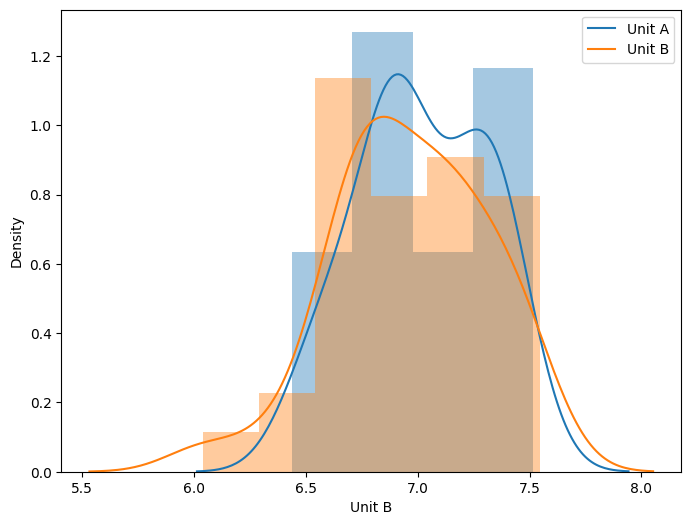

In [ ]:
plt.figure(figsize = (8,6))
labels = ['Unit A', 'Unit B']
sns.distplot(dataset['Unit A'], kde = True)
sns.distplot(dataset['Unit B'],hist = True)
plt.legend(labels)

        count      mean       std     min     25%     50%      75%     max
Unit A   35.0  7.019091  0.288408  6.4376  6.8315  6.9438  7.28055  7.5169
Unit B   35.0  6.964297  0.343401  6.0380  6.7536  6.9399  7.19500  7.5459


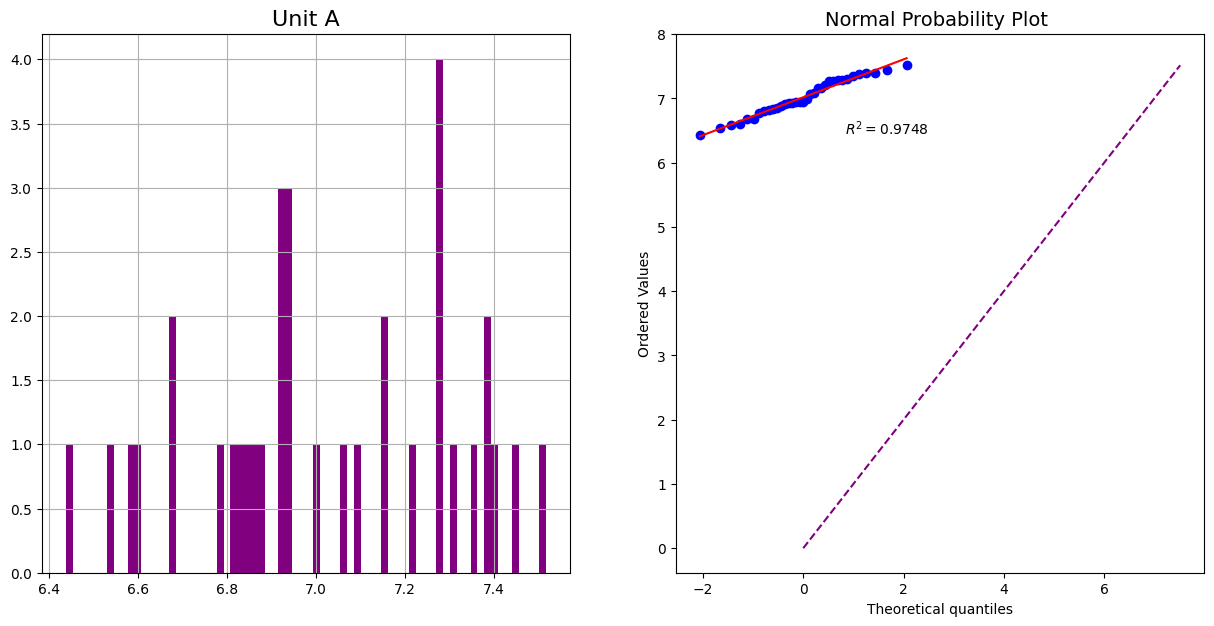

In [ ]:
# Plotting the histogram and normal probability plot
plt.figure(figsize=(15,7))

# Histogram
plt.subplot(1,2,1)
dataset['Unit A'].hist(bins=70, color='purple')
plt.title('Unit A', fontsize=16)

# Normal Probability Plot
plt.subplot(1,2,2)
# Create the normal probability plot using stats.probplot
stats.probplot(dataset['Unit A'], plot=plt, fit=True, rvalue=True)
# Add a line to the plot
plt.plot([0, max(dataset['Unit A'])], [0, max(dataset['Unit A'])], color='purple', linestyle='--')
plt.title('Normal Probability Plot ', fontsize=14)


# Printing the summary statistics
print(dataset.describe().T)

        count      mean       std     min     25%     50%      75%     max
Unit A   35.0  7.019091  0.288408  6.4376  6.8315  6.9438  7.28055  7.5169
Unit B   35.0  6.964297  0.343401  6.0380  6.7536  6.9399  7.19500  7.5459


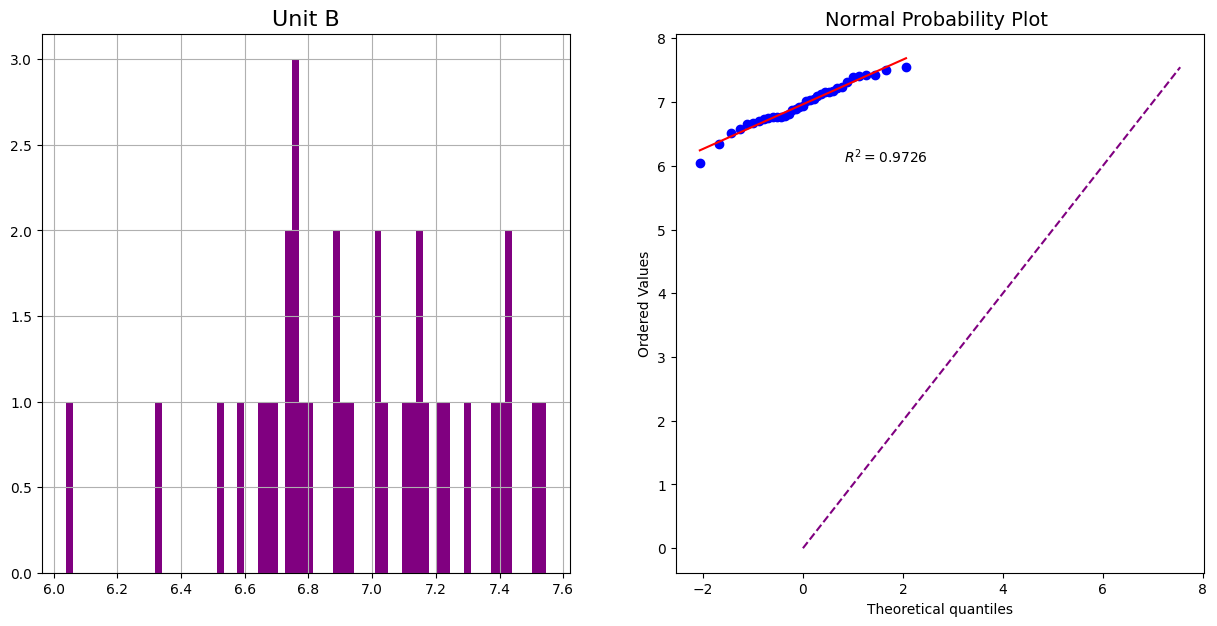

In [ ]:
# Plotting the histogram and normal probability plot
plt.figure(figsize=(15,7))

# Histogram
plt.subplot(1,2,1)
dataset['Unit B'].hist(bins=70, color='purple')
plt.title('Unit B', fontsize=16)

# Normal Probability Plot
plt.subplot(1,2,2)
# Create the normal probability plot using stats.probplot
stats.probplot(dataset['Unit B'], plot=plt, fit=True, rvalue=True)
# Add a line to the plot
plt.plot([0, max(dataset['Unit B'])], [0, max(dataset['Unit B'])], color='purple', linestyle='--')
plt.title('Normal Probability Plot ', fontsize=14)


# Printing the summary statistics
print(dataset.describe().T)

In [ ]:
statistic , p_value=stats.ttest_ind(dataset['Unit A'],dataset['Unit B'],alternative='two-sided')
print("pvalue is ", p_value)

pvalue is  0.4722394724599501


In [ ]:
alpha = 0.025
print('Significnace=%.3f, p=%.3f' % (alpha, p_value))
if p_value <= alpha:
    print('Null Hypothesis is rejected as there is a significant difference between Unit A and Unit B')
else:
    print('We fail to reject Null hypothesis')

Significnace=0.025, p=0.472
We fail to reject Null hypothesis


# **Hypothesis Testing Exercise 2**

# **A hospital wants to determine whether there is any difference in the average Turn Around Time (TAT) of reports of the laboratories on their preferred list. They collected a random sample and recorded TAT for reports of 4 laboratories. TAT is defined as sample collected to report dispatch.**
   
#** Analyze the data and determine whether there is any difference in average TAT among the different laboratories at 5% significance level.

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import stats

In [ ]:
lab = pd.read_csv('/content/LabTAT.csv')
lab.head()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60


In [ ]:
lab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laboratory 1  120 non-null    float64
 1   Laboratory 2  120 non-null    float64
 2   Laboratory 3  120 non-null    float64
 3   Laboratory 4  120 non-null    float64
dtypes: float64(4)
memory usage: 3.9 KB


In [ ]:
lab.describe()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
count,120.000000,120.000000,120.000000,120.00000
mean,178.361583,178.902917,199.913250,163.68275
std,13.173594,14.957114,16.539033,15.08508
min,138.300000,140.550000,159.690000,124.06000
25%,170.335000,168.025000,188.232500,154.05000
50%,178.530000,178.870000,199.805000,164.42500
75%,186.535000,189.112500,211.332500,172.88250
max,216.390000,217.860000,238.700000,205.18000


In [ ]:
lab.isnull().sum()

Laboratory 1    0
Laboratory 2    0
Laboratory 3    0
Laboratory 4    0
dtype: int64

In [ ]:
lab[lab.duplicated()]

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4


In [ ]:
import matplotlib.pyplot as plt


<ipython-input-12-509e098855bd>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(221)


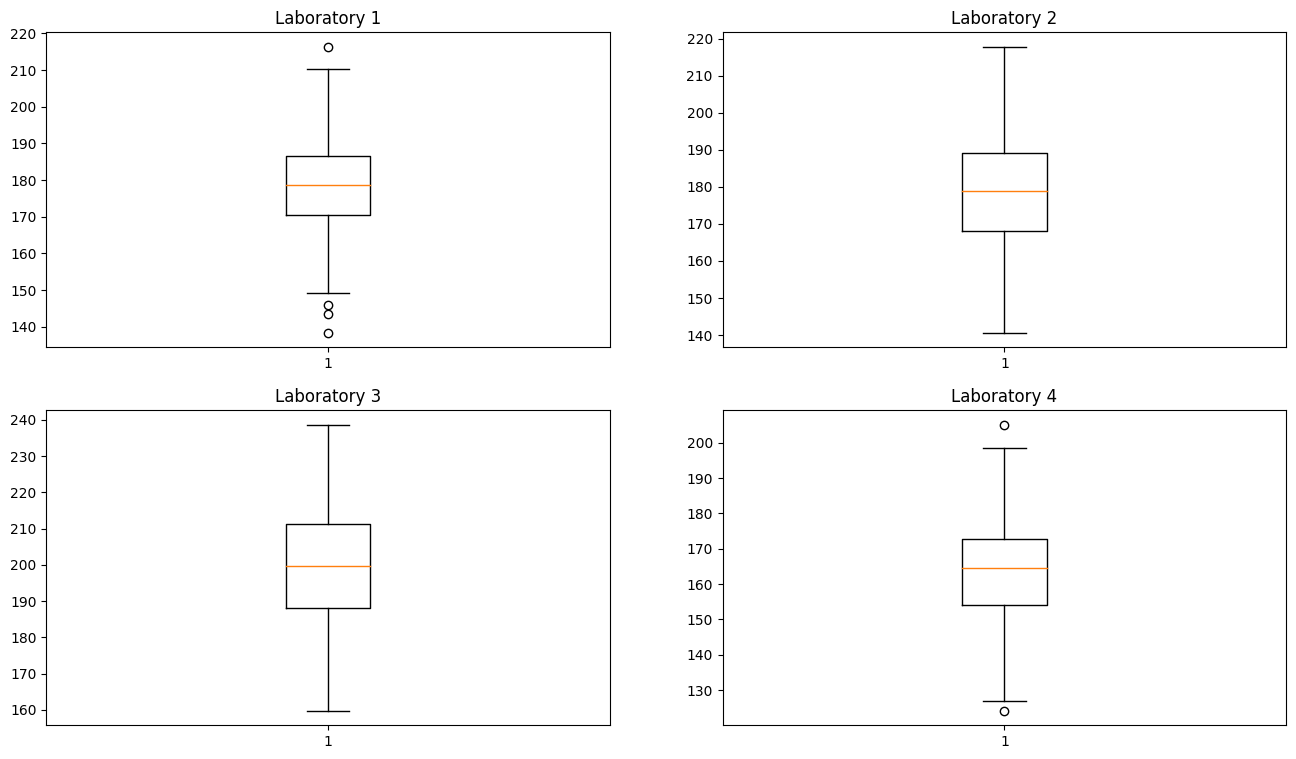

In [ ]:
plt.subplots(figsize = (16,9))
plt.subplot(221)
plt.boxplot(lab['Laboratory 1'])
plt.title('Laboratory 1')
plt.subplot(222)
plt.boxplot(lab['Laboratory 2'])
plt.title('Laboratory 2')
plt.subplot(223)
plt.boxplot(lab['Laboratory 3'])
plt.title('Laboratory 3')
plt.subplot(224)
plt.boxplot(lab['Laboratory 4'])
plt.title('Laboratory 4')
plt.show()


<ipython-input-14-ac22e75c1623>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(lab['Laboratory 1'], kde = True)
<ipython-input-14-ac22e75c1623>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(lab['Laboratory 2'],hist = True)
<ipython-input-14-ac22e75c1623>:6: UserWarning: 

`distplot` is a de

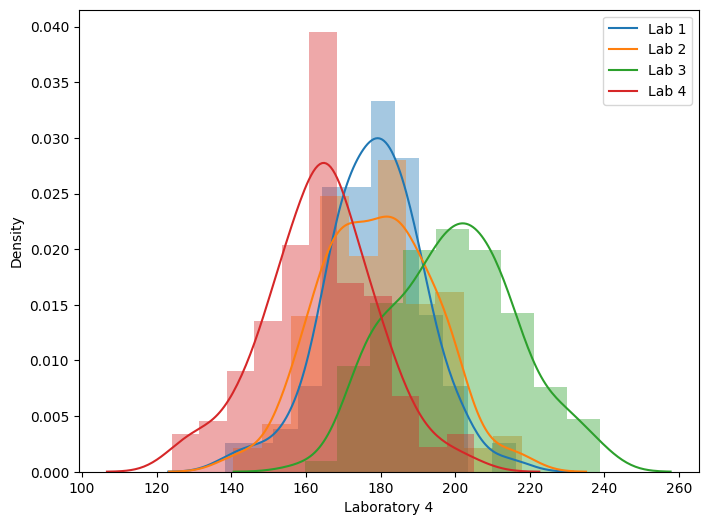

In [ ]:
import seaborn as sns
plt.figure(figsize = (8,6))
labels = ['Lab 1', 'Lab 2','Lab 3', 'Lab 4']
sns.distplot(lab['Laboratory 1'], kde = True)
sns.distplot(lab['Laboratory 2'],hist = True)
sns.distplot(lab['Laboratory 3'],hist = True)
sns.distplot(lab['Laboratory 4'],hist = True)
plt.legend(labels)

count    120.000000
mean     178.361583
std       13.173594
min      138.300000
25%      170.335000
50%      178.530000
75%      186.535000
max      216.390000
Name: Laboratory 1, dtype: float64


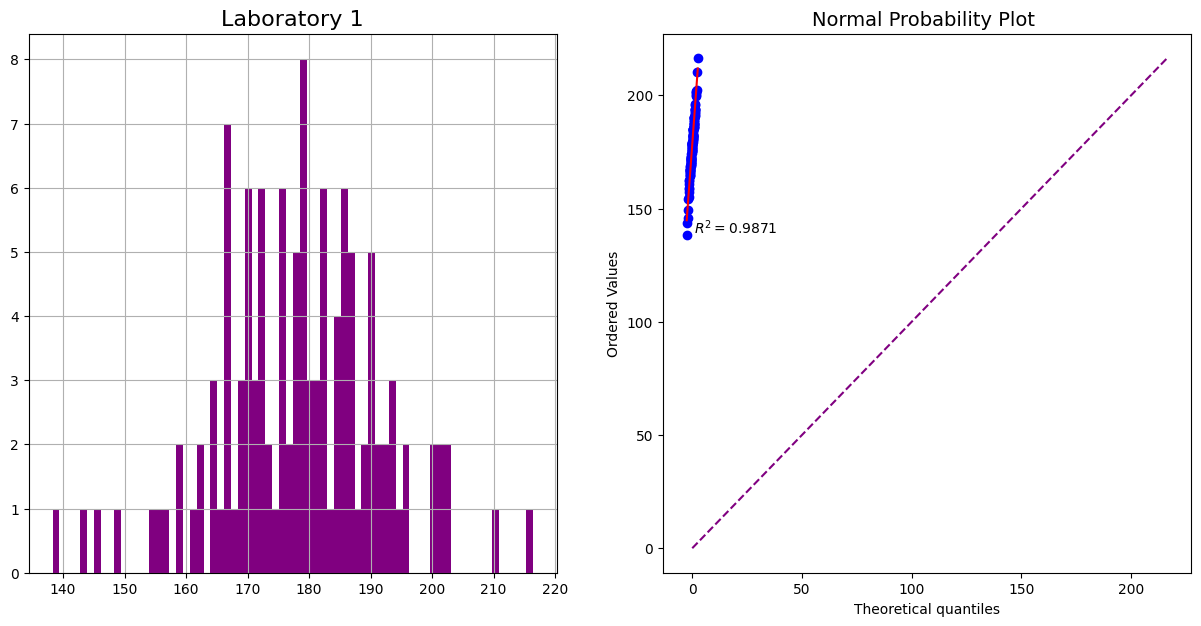

In [ ]:
from scipy.stats import norm
# Plotting the histogram and normal probability plot
plt.figure(figsize=(15,7))

# Histogram
plt.subplot(1,2,1)
lab['Laboratory 1'].hist(bins=70, color='purple')
plt.title('Laboratory 1', fontsize=16)

# Normal Probability Plot
plt.subplot(1,2,2)
# Create the normal probability plot using stats.probplot
stats.probplot(lab['Laboratory 1'], plot=plt, fit=True, rvalue=True)
# Add a line to the plot
plt.plot([0, max(lab['Laboratory 1'])], [0, max(lab['Laboratory 1'])], color='purple', linestyle='--')
plt.title('Normal Probability Plot ', fontsize=14)


# Printing the summary statistics
print(lab['Laboratory 1'].describe().T)

count    120.000000
mean     178.902917
std       14.957114
min      140.550000
25%      168.025000
50%      178.870000
75%      189.112500
max      217.860000
Name: Laboratory 2, dtype: float64


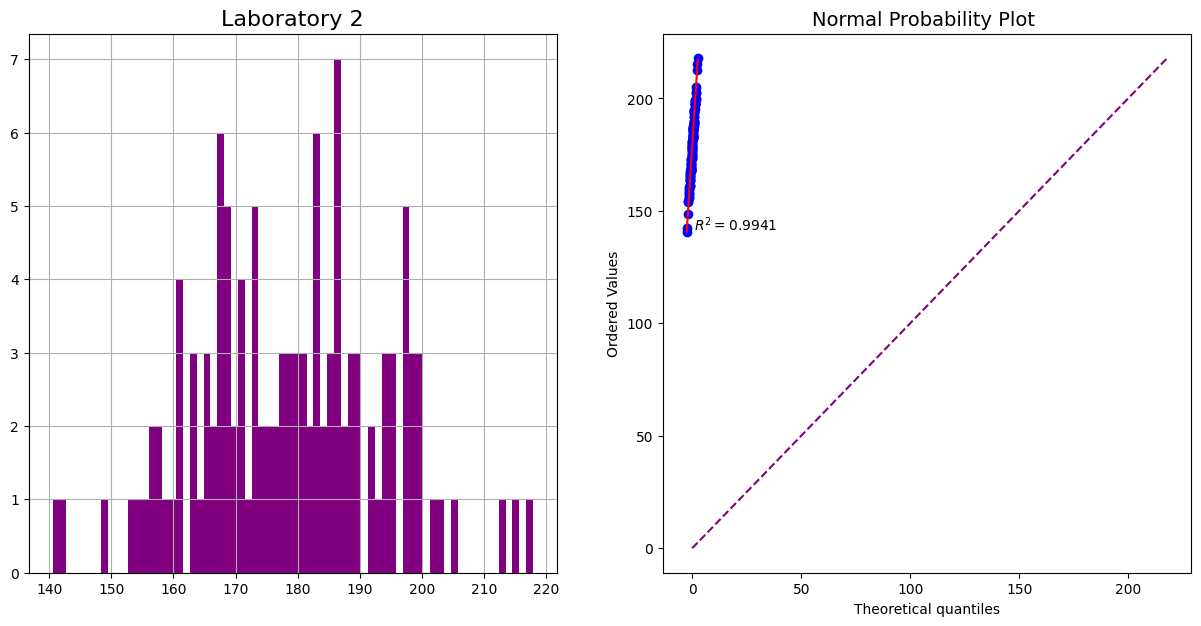

In [ ]:
from scipy.stats import norm
# Plotting the histogram and normal probability plot
plt.figure(figsize=(15,7))

# Histogram
plt.subplot(1,2,1)
lab['Laboratory 2'].hist(bins=70, color='purple')
plt.title('Laboratory 2', fontsize=16)

# Normal Probability Plot
plt.subplot(1,2,2)
# Create the normal probability plot using stats.probplot
stats.probplot(lab['Laboratory 2'], plot=plt, fit=True, rvalue=True)
# Add a line to the plot
plt.plot([0, max(lab['Laboratory 2'])], [0, max(lab['Laboratory 2'])], color='purple', linestyle='--')
plt.title('Normal Probability Plot ', fontsize=14)


# Printing the summary statistics
print(lab['Laboratory 2'].describe().T)

count    120.000000
mean     199.913250
std       16.539033
min      159.690000
25%      188.232500
50%      199.805000
75%      211.332500
max      238.700000
Name: Laboratory 3, dtype: float64


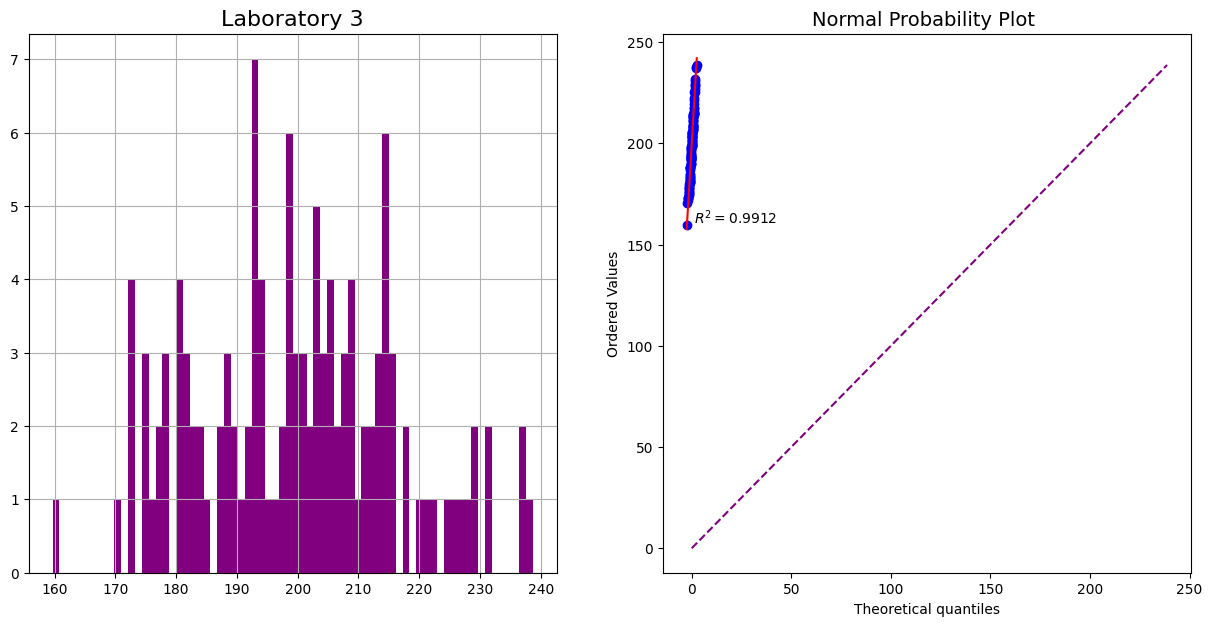

In [ ]:
from scipy.stats import norm
# Plotting the histogram and normal probability plot
plt.figure(figsize=(15,7))

# Histogram
plt.subplot(1,2,1)
lab['Laboratory 3'].hist(bins=70, color='purple')
plt.title('Laboratory 3', fontsize=16)

# Normal Probability Plot
plt.subplot(1,2,2)
# Create the normal probability plot using stats.probplot
stats.probplot(lab['Laboratory 3'], plot=plt, fit=True, rvalue=True)
# Add a line to the plot
plt.plot([0, max(lab['Laboratory 3'])], [0, max(lab['Laboratory 3'])], color='purple', linestyle='--')
plt.title('Normal Probability Plot ', fontsize=14)


# Printing the summary statistics
print(lab['Laboratory 3'].describe().T)

count    120.00000
mean     163.68275
std       15.08508
min      124.06000
25%      154.05000
50%      164.42500
75%      172.88250
max      205.18000
Name: Laboratory 4, dtype: float64


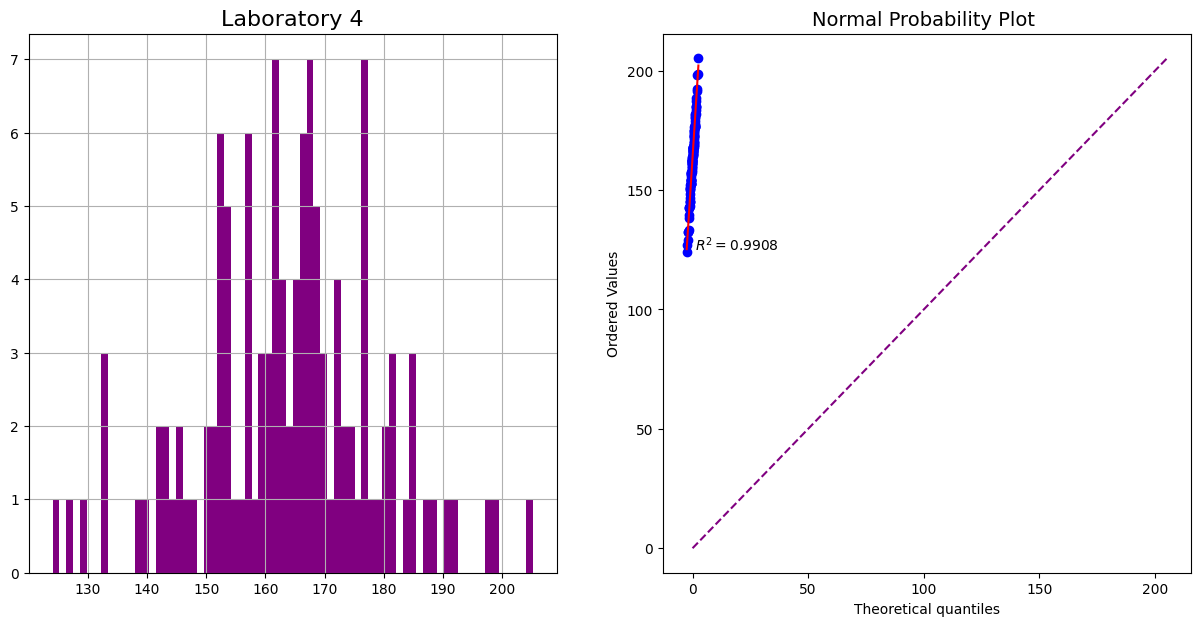

In [ ]:
from scipy.stats import norm
# Plotting the histogram and normal probability plot
plt.figure(figsize=(15,7))

# Histogram
plt.subplot(1,2,1)
lab['Laboratory 4'].hist(bins=70, color='purple')
plt.title('Laboratory 4', fontsize=16)

# Normal Probability Plot
plt.subplot(1,2,2)
# Create the normal probability plot using stats.probplot
stats.probplot(lab['Laboratory 4'], plot=plt, fit=True, rvalue=True)
# Add a line to the plot
plt.plot([0, max(lab['Laboratory 4'])], [0, max(lab['Laboratory 4'])], color='purple', linestyle='--')
plt.title('Normal Probability Plot ', fontsize=14)


# Printing the summary statistics
print(lab['Laboratory 4'].describe().T)

In [ ]:
statistic2 , p_value2 = stats.f_oneway(lab['Laboratory 1'],lab['Laboratory 2'],lab['Laboratory 3'],lab['Laboratory 4'])
print('pvalue =',p_value2)

pvalue = 2.1156708949992414e-57


In [ ]:
alpha = 0.025
print('Significnace=%.3f, p=%.3f' % (alpha, p_value2))
if p_value2 <= alpha:
    print('Null Hypothesis is rejected as there is a significant difference between TAT reports ')
else:
    print('We fail to reject Null hypothesis')

Significnace=0.025, p=0.000
Null Hypothesis is rejected as there is a significant difference between TAT reports 


# **HYPOTHESIS TESTING EXERCISE 3**

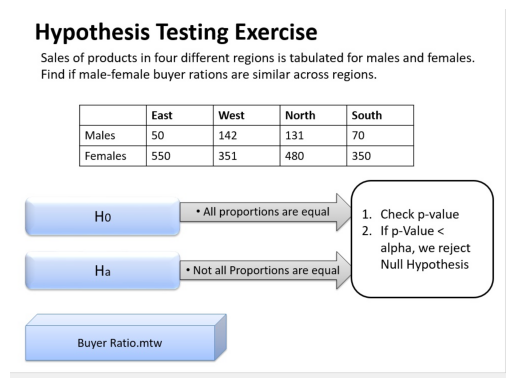

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('/content/HYPOTHESIS TESTING 3.jpg')
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
import pandas as pd
sales = pd.read_csv('/content/BuyerRatio.csv')

In [ ]:
sales

,Observed Values,East,West,North,South
0,Males,50,142,131,70
1,Females,435,1523,1356,750


In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Observed Values  2 non-null      object
 1   East             2 non-null      int64 
 2   West             2 non-null      int64 
 3   North            2 non-null      int64 
 4   South            2 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 208.0+ bytes


In [ ]:
sales.describe()

,East,West,North,South
count,2.000000,2.000000,2.000000,2.000000
mean,242.500000,832.500000,743.500000,410.000000
std,272.236111,976.514465,866.205807,480.832611
min,50.000000,142.000000,131.000000,70.000000
25%,146.250000,487.250000,437.250000,240.000000
50%,242.500000,832.500000,743.500000,410.000000
75%,338.750000,1177.750000,1049.750000,580.000000
max,435.000000,1523.000000,1356.000000,750.000000


In [ ]:
sales.isnull().sum()

Observed Values    0
East               0
West               0
North              0
South              0
dtype: int64

In [ ]:
sales[sales.duplicated()]

,Observed Values,East,West,North,South


{'whiskers': [<matplotlib.lines.Line2D at 0x7fd3c64ea650>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd3c64eab00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd3c64ea3b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd3c64eb040>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd3c64eb2e0>],
 'means': []}

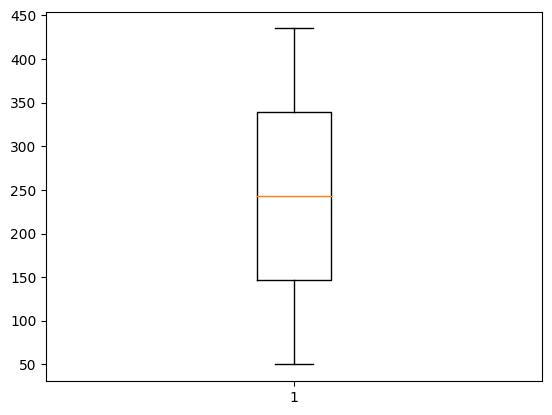

In [ ]:
import matplotlib.pyplot as plt
plt.boxplot(sales['East'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd3c637ed10>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd3c637f160>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd3c637ebc0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd3c637f6a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd3c637f940>],
 'means': []}

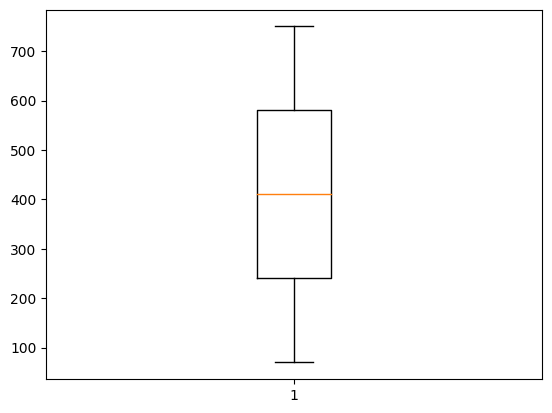

In [ ]:
plt.boxplot(sales['South'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd3c63fe530>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd3c63fe950>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd3c63fe290>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd3c63fee90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd3c63ff130>],
 'means': []}

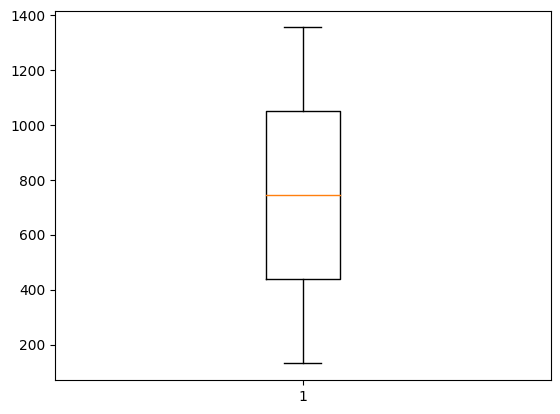

In [ ]:
plt.boxplot(sales['North'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd3c628d630>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd3c628da50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd3c628d390>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd3c628df90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd3c628e230>],
 'means': []}

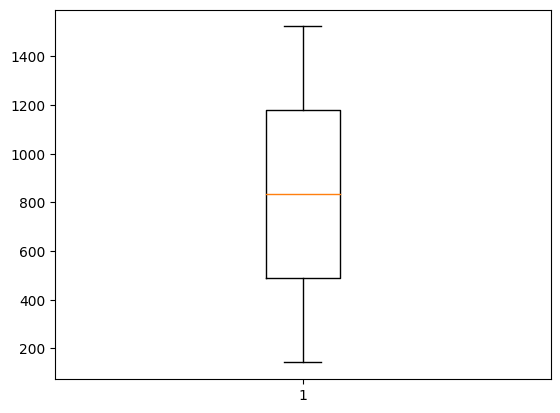

In [ ]:
plt.boxplot(sales['West'])

<ipython-input-12-875845670068>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales['North'],color='purple')


Kurtosis of the distribution: -2.0
Skewness of the distribution: 0.0


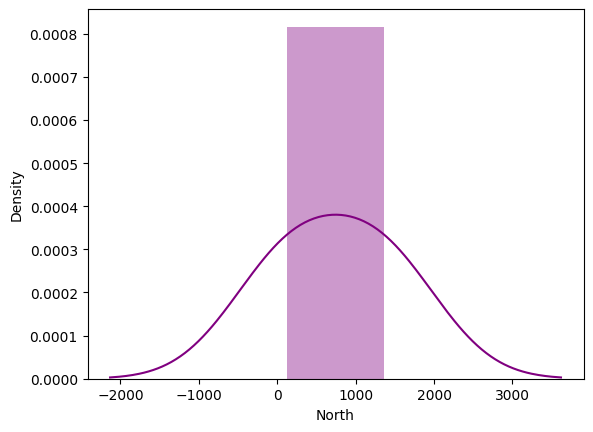

In [ ]:
import seaborn as sns
import scipy.stats as stats
sns.distplot(sales['North'],color='purple')
print( 'Kurtosis of the distribution: {}'.format(stats.kurtosis(sales['North']))) # for normal it should be close to zero
print( 'Skewness of the distribution: {}'.format(stats.skew(sales['North']))) # for normal skewness should be btwn -1 and 1

<ipython-input-13-3be34208c40c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales['South'],color='purple')


Kurtosis of the distribution: -2.0
Skewness of the distribution: 0.0


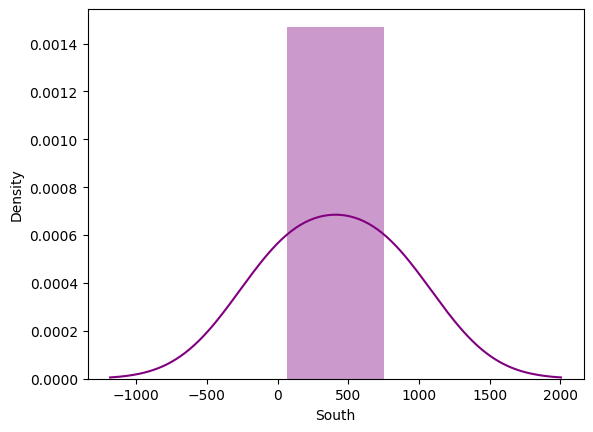

In [ ]:
sns.distplot(sales['South'],color='purple')
print( 'Kurtosis of the distribution: {}'.format(stats.kurtosis(sales['South']))) # for normal it should be close to zero
print( 'Skewness of the distribution: {}'.format(stats.skew(sales['South']))) # for normal skewness should be btwn -1 and 1

<ipython-input-14-803b1b5e9917>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales['East'],color='purple')


Kurtosis of the distribution: -2.0
Skewness of the distribution: 0.0


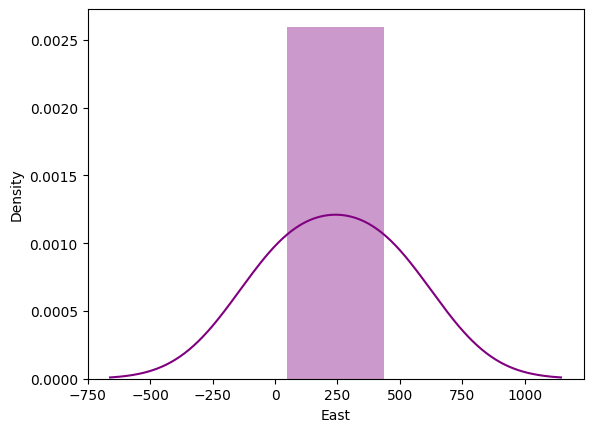

In [ ]:
sns.distplot(sales['East'],color='purple')
print( 'Kurtosis of the distribution: {}'.format(stats.kurtosis(sales['East']))) # for normal it should be close to zero
print( 'Skewness of the distribution: {}'.format(stats.skew(sales['East']))) # for normal skewness should be btwn -1 and 1

<ipython-input-15-ab9dbb06ad6f>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales['North'], kde = True)
<ipython-input-15-ab9dbb06ad6f>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales['South'],hist = True)
<ipython-input-15-ab9dbb06ad6f>:6: UserWarning: 

`distplot` is a deprecated f

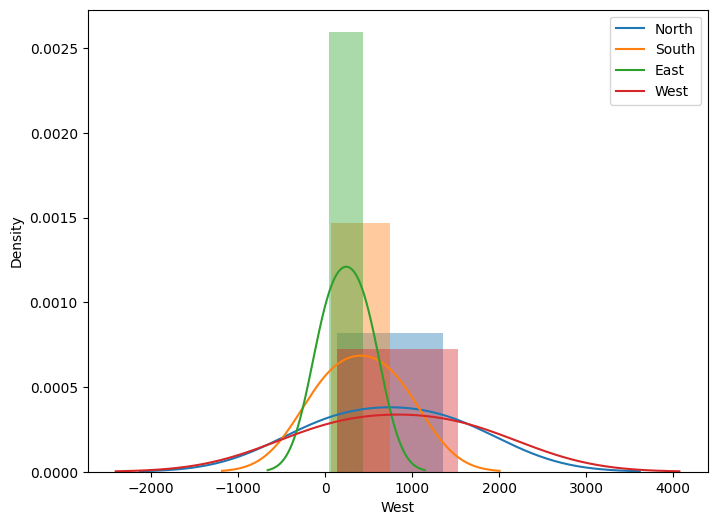

In [ ]:
import seaborn as sns
plt.figure(figsize = (8,6))
labels = ['North', 'South','East', 'West']
sns.distplot(sales['North'], kde = True)
sns.distplot(sales['South'],hist = True)
sns.distplot(sales['East'],hist = True)
sns.distplot(sales['West'],hist = True)
plt.legend(labels)

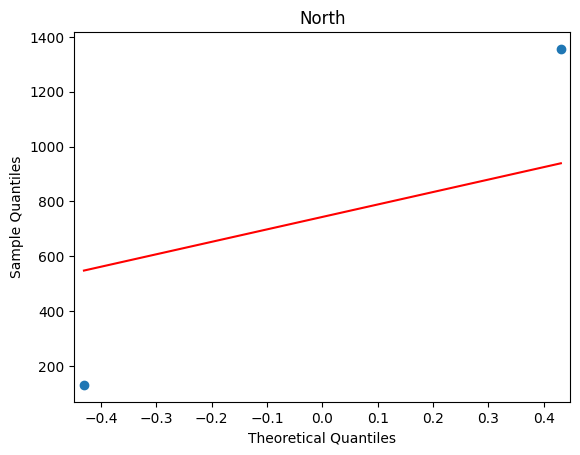

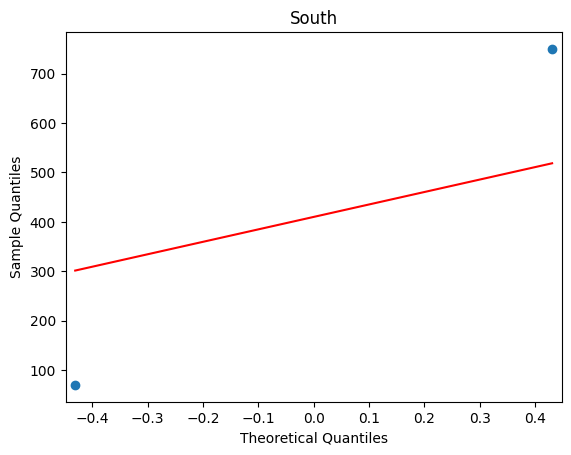

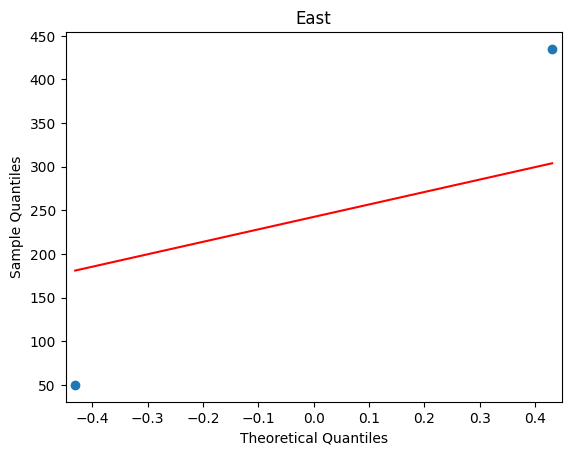

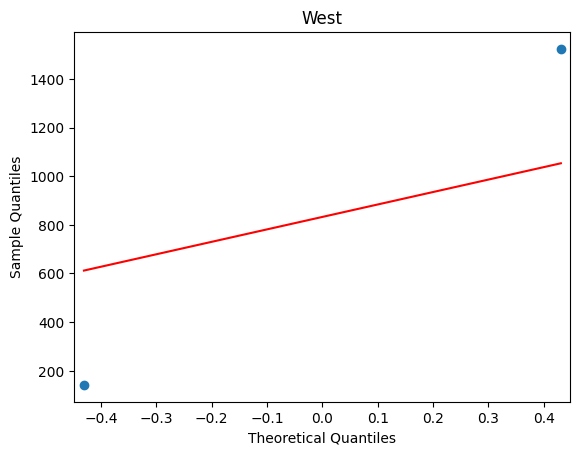

In [ ]:
import statsmodels.api as sm
sm.qqplot(sales['North'], line = 'q')
plt.title('North')
sm.qqplot(sales['South'], line = 'q')
plt.title('South')
sm.qqplot(sales['East'], line = 'q')
plt.title('East')
sm.qqplot(sales['West'], line = 'q')
plt.title('West')
plt.show()

In [ ]:
table = [[50,142,131,70],
        [435,1523,1356,750]]

In [ ]:
stats.chi2_contingency(table)

Chi2ContingencyResult(statistic=1.595945538661058, pvalue=0.6603094907091882, dof=3, expected_freq=array([[  42.76531299,  146.81287862,  131.11756787,   72.30424052],
       [ 442.23468701, 1518.18712138, 1355.88243213,  747.69575948]]))

In [ ]:
stat, p, dof, exp = stats.chi2_contingency(table)
print(stat,"\n", p,"\n", dof,"\n", exp)

1.595945538661058 
 0.6603094907091882 
 3 
 [[  42.76531299  146.81287862  131.11756787   72.30424052]
 [ 442.23468701 1518.18712138 1355.88243213  747.69575948]]


In [ ]:
import numpy as np
observed = np.array([50,142,131,70,435,1523,1356,750])
expected = np.array([42.76531299,146.81287862,131.11756787,72.30424052,442.23468701,1518.18712138,1355.88243213,747.69575948])

In [ ]:
statistics3, p_value3 = stats.chisquare(observed, expected, ddof = 3)
print("Statistics = ",statistics3,"\n",'P_Value = ', p_value3)

Statistics =  1.5959455390914483 
 P_Value =  0.8095206646905712


In [ ]:
alpha1 = 0.05
print('Significnace=%.3f, p=%.3f' % (alpha1, p_value3))
if p_value3 <= alpha1:
    print('We reject Null Hypothesis  as there is a significant difference between buyer ratio')
else:
    print('We fail to reject Null hypothesis')

Significnace=0.050, p=0.810
We fail to reject Null hypothesis


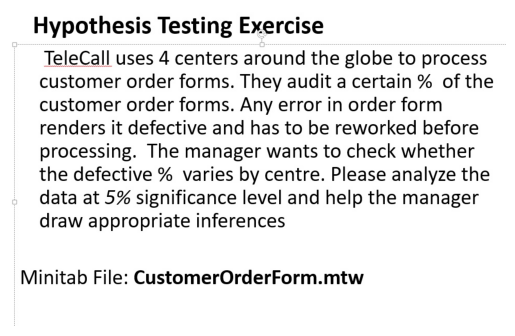

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('/content/Hypothesis testing 4.jpg')
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
customer = pd.read_csv('/content/Costomer+OrderForm.csv')

In [ ]:
customer

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free
...,...,...,...,...
295,Error Free,Error Free,Error Free,Error Free
296,Error Free,Error Free,Error Free,Error Free
297,Error Free,Error Free,Defective,Error Free
298,Error Free,Error Free,Error Free,Error Free


In [ ]:
customer.describe()

,Phillippines,Indonesia,Malta,India
count,300,300,300,300
unique,2,2,2,2
top,Error Free,Error Free,Error Free,Error Free
freq,271,267,269,280


In [ ]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Phillippines  300 non-null    object
 1   Indonesia     300 non-null    object
 2   Malta         300 non-null    object
 3   India         300 non-null    object
dtypes: object(4)
memory usage: 9.5+ KB


In [ ]:
customer.isnull().sum()

Phillippines    0
Indonesia       0
Malta           0
India           0
dtype: int64

In [ ]:
customer[customer.duplicated()]

,Phillippines,Indonesia,Malta,India
4,Error Free,Error Free,Defective,Error Free
5,Error Free,Error Free,Error Free,Error Free
7,Error Free,Error Free,Error Free,Error Free
8,Error Free,Error Free,Error Free,Error Free
9,Error Free,Error Free,Error Free,Error Free
...,...,...,...,...
295,Error Free,Error Free,Error Free,Error Free
296,Error Free,Error Free,Error Free,Error Free
297,Error Free,Error Free,Defective,Error Free
298,Error Free,Error Free,Error Free,Error Free


In [ ]:
print(customer['Phillippines'].value_counts())


Error Free    271
Defective      29
Name: Phillippines, dtype: int64


In [ ]:
customer['Indonesia'].value_counts()

Error Free    267
Defective      33
Name: Indonesia, dtype: int64

In [ ]:
customer['Malta'].value_counts()

Error Free    269
Defective      31
Name: Malta, dtype: int64

In [ ]:
customer['India'].value_counts()

Error Free    280
Defective      20
Name: India, dtype: int64

In [ ]:
contingency_table = [[271,267,269,280],
                    [29,33,31,20]]
print(contingency_table)

[[271, 267, 269, 280], [29, 33, 31, 20]]


In [ ]:
stats4, p4, df4, exp4 = stats.chi2_contingency(contingency_table)
print("Statistics = ",stats4,"\n",'P_Value = ', p4,'\n', 'degree of freedom =', df4,'\n', 'Expected Values = ', exp4)

Statistics =  3.858960685820355 
 P_Value =  0.2771020991233135 
 degree of freedom = 3 
 Expected Values =  [[271.75 271.75 271.75 271.75]
 [ 28.25  28.25  28.25  28.25]]


In [ ]:
observed4 = np.array([271, 267, 269, 280, 29, 33, 31, 20])
expected4 = np.array([271.75, 271.75, 271.75, 271.75, 28.25, 28.25, 28.25, 28.25])

In [ ]:
test_statistic4 , p_value4 = stats.chisquare(observed4, expected4, ddof = 3)
print("Test Statistic = ",test_statistic4,'\n', 'p_value =',p_value4)

Test Statistic =  3.858960685820355 
 p_value = 0.4254298144535761


In [ ]:
alpha4 = 0.05
print('Significnace=%.3f, p=%.3f' % (alpha4, p_value4))
if p_value4 <= alpha4:
    print('We reject Null Hypothesis as there is a significant difference between customer ratio')
else:
    print('We fail to reject Null hypothesis')

Significnace=0.050, p=0.425
We fail to reject Null hypothesis
